In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp /content/drive/MyDrive/Personal/kaggle.json /content/

Mounted at /content/drive


In [ ]:
!pip install kaggle

In [ ]:
# configurar json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Descargar
!kaggle competitions download -c cifar-10

 99% 705M/715M [00:13<00:00, 119MB/s]
100% 715M/715M [00:13<00:00, 55.1MB/s]


In [ ]:
!ls

cifar-10.zip  drive  kaggle.json  sample_data


In [ ]:
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
!ls

cifar-10.zip  kaggle.json  sampleSubmission.csv  train.7z
drive	      sample_data  test.7z		 trainLabels.csv


In [ ]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 36.7 MB/s eta 0:00:00


In [ ]:
import py7zr
archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
archive.close()

In [ ]:
!ls

cifar-10.zip  kaggle.json  sampleSubmission.csv  train	   trainLabels.csv
drive	      sample_data  test.7z		 train.7z


In [ ]:
"""Import dependecies"""
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
filename = os.listdir('/content/train')
type(filename) # type list
len(filename) # 50000 train images

50000

In [ ]:
"""Processing Labels"""
labels = pd.read_csv('/content/trainLabels.csv')
labels.shape

(50000, 2)

In [ ]:
labels.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [ ]:
labels['label']

,label
0,frog
1,truck
2,truck
3,deer
4,automobile
...,...
49995,bird
49996,frog
49997,truck
49998,automobile


In [ ]:
"""
Processing Images
Label codes
  frog = 0
  deer = 1
  automobile = 2
  bird = 3
  cat = 4
  dog = 5
  ship = 6
  horse = 7
  truck = 8
  airplane = 9
"""
labels_dict = {'frog':0, 'deer':1, 'automobile':2, 'bird':3, 'cat':4, 'dog':5, 'ship':6, 'horse':7, 'truck':8, 'airplane':9}
label = labels.replace({'label':labels_dict})

<ipython-input-19-4dffe960fdd4>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  label = labels.replace({'label':labels_dict})


In [ ]:
print(label[0:5])
print(label[-5:])

   id  label
0   1      0
1   2      8
2   3      8
3   4      1
4   5      2
          id  label
49995  49996      3
49996  49997      0
49997  49998      8
49998  49999      2
49999  50000      2


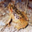

In [ ]:
"""Mostrar imagen"""
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

In [ ]:
# Every image in folder train calls 1.png, 2.png etc...
id_list = list(label['id'])
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


In [ ]:
"""Image processing"""
# Convert images to numpy array
train_folder = '/content/train/'
data = []
for id in id_list:
  img = Image.open(train_folder + str(id) + '.png')
  img = np.array(img) #transform array
  data.append(img)

print(len(data), type(data))

50000 <class 'list'>


In [ ]:
X = np.array(data)
y = np.array(label['label'])
print(X.shape, y.shape)

(50000, 32, 32, 3) (50000,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [ ]:
# Scale images 0 - 1
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
'''Building neural network'''
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_class = 10

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_class, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# training
model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2185 - loss: 2.1316 - val_accuracy: 0.2790 - val_loss: 1.9409
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2931 - loss: 1.8991 - val_accuracy: 0.2985 - val_loss: 1.8881
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3135 - loss: 1.8586 - val_accuracy: 0.3100 - val_loss: 1.8693
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3203 - loss: 1.8613 - val_accuracy: 0.3072 - val_loss: 1.8746
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3319 - loss: 1.8320 - val_accuracy: 0.3158 - val_loss: 1.8442
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3333 - loss: 1.8395 - val_accuracy: 0.3117 - val_loss: 1.8502
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3365 - loss: 1.8230 - val_accuracy: 0.3187 - val_loss: 1.8480
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3386 - loss: 1.8192 - 

In [ ]:
"""RESNET 50"""
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
'''
Loading Resnet
  include_top = false elimina la ultima capa de prediccion de imagenet
  Resnet works with images 256x256x3
'''
model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
model_resnet.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
model = models.Sequential()
# Reescale image from 32 to 256
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
# Add resnet
model.add(model_resnet)
#
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_class,activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 454s 355ms/step - accuracy: 0.3228 - loss: 2.0749 - val_accuracy: 0.7580 - val_loss: 0.9220
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 405s 360ms/step - accuracy: 0.6652 - loss: 1.0945 - val_accuracy: 0.8717 - val_loss: 0.5386
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 444s 361ms/step - accuracy: 0.7926 - loss: 0.7831 - val_accuracy: 0.9103 - val_loss: 0.3728
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 432s 352ms/step - accuracy: 0.8589 - loss: 0.5891 - val_accuracy: 0.9227 - val_loss: 0.3036
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 431s 343ms/step - accuracy: 0.9000 - loss: 0.4610 - val_accuracy: 0.9293 - val_loss: 0.2755
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 462s 361ms/step - accuracy: 0.9309 - loss: 0.3580 - val_accuracy: 0.9367 - val_loss: 0.2476
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 434s 353ms/step - accuracy: 0.9491 - loss: 0.2920 - val_accuracy: 0.9325 - val_loss: 0.2566
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 443s 354ms/step - ac

In [35]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 112ms/step - accuracy: 0.9388 - loss: 0.2326
Loss:  0.24079512059688568
Accuracy:  0.9366000294685364


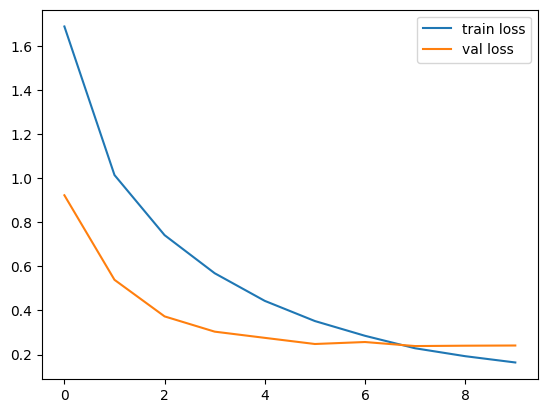

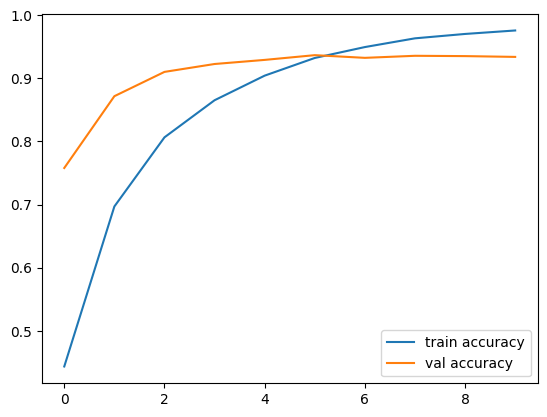

In [36]:
h = history

# plot loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()